# **Los Angeles City Crimes data**

| S.No|Column Name  | Description                                           |
|-----|---------|-------------------------------------------------------|
| 1. | DR_NO        | Unique identifier or case number for each crime report|
| 2. | Date Rptd    | Date when the crime was reported                       |
| 3. | DATE OCC     | Date when the crime occurred                           |
| 4. | TIME OCC     | Time when the crime occurred                           |
| 5. | AREA NAME    | Geographical area or jurisdiction where the crime took place|
| 6.  |Crm Cd Desc  | Description of the crime code or type of crime         |
| 7.  |Vict Age     | Age of the victim                                      |
| 8.  |Vict Sex     | Gender of the victim                                   |
| 9.  |Vict Descent | Descent or ethnicity of the victim                      |
| 10. |Weapon Desc  | Description of the weapon, if any, used in the crime    |
| 11. |Status Desc  | Current status or stage of the investigation or case    |
| 12. |LOCATION     | Location or address where the crime occurred            |


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/12_Analyzing-Crime-in-Los-Angeles/crimes.csv"

crimes = pd.read_csv(url)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [2]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [3]:
# Get information about the DataFrame
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         247988 non-null  int64 
 1   Date Rptd     247988 non-null  object
 2   DATE OCC      247988 non-null  object
 3   TIME OCC      247988 non-null  int64 
 4   AREA NAME     247988 non-null  object
 5   Crm Cd Desc   247988 non-null  object
 6   Vict Age      247988 non-null  int64 
 7   Vict Sex      215740 non-null  object
 8   Vict Descent  215739 non-null  object
 9   Weapon Desc   80087 non-null   object
 10  Status Desc   247988 non-null  object
 11  LOCATION      247988 non-null  object
dtypes: int64(3), object(9)
memory usage: 22.7+ MB


In [4]:
# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {crimes.shape[0]}")
print(f"Number of columns: {crimes.shape[1]}")

Number of rows: 247988
Number of columns: 12


In [5]:
# Check for missing values
missing_values = crimes.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
dtype: int64


In [6]:
# Iterate through columns and print the number of unique labels
for col in crimes.columns:
    unique_labels = crimes[col].nunique()
    print(f"Number of unique labels in column '{col}': {unique_labels}")

Number of unique labels in column 'DR_NO': 247988
Number of unique labels in column 'Date Rptd': 398
Number of unique labels in column 'DATE OCC': 1168
Number of unique labels in column 'TIME OCC': 1439
Number of unique labels in column 'AREA NAME': 21
Number of unique labels in column 'Crm Cd Desc': 110
Number of unique labels in column 'Vict Age': 101
Number of unique labels in column 'Vict Sex': 5
Number of unique labels in column 'Vict Descent': 20
Number of unique labels in column 'Weapon Desc': 74
Number of unique labels in column 'Status Desc': 6
Number of unique labels in column 'LOCATION': 43667


### **Pre-Processing**

In [7]:
# Convert the "Date Rptd" and "DATE OCC" columns to datetime format, handling potential errors
crimes["Date Rptd"] = pd.to_datetime(crimes["Date Rptd"], errors='coerce')
crimes["DATE OCC"] = pd.to_datetime(crimes["DATE OCC"], errors='coerce')

# Convert the "TIME OCC" column to datetime format and extract the hour component
# Fill missing values with 0 and convert to integers
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')
crimes['hour'] = crimes['TIME OCC'].dt.hour.fillna(0).astype(int)

# Create a new column "night_crime" indicating whether the crime occurred during nighttime (between 10 PM and 3 AM)
crimes['night_crime'] = ((crimes['hour'] >= 22) | (crimes['hour'] <= 3))

# Assuming the column 'Victim Age' contains the age of the victims, categorize them into age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Define the age group bins
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

# Categorize victim ages into age groups using pd.cut
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)


crimes['AREA NAME'] = pd.Categorical(crimes['AREA NAME'])
crimes['Vict Sex'] = pd.Categorical(crimes['Vict Sex'])
crimes['Weapon Desc'] = pd.Categorical(crimes['Weapon Desc'])
crimes['Status Desc'] = pd.Categorical(crimes['Status Desc'])
crimes['Crm Cd Desc'] = pd.Categorical(crimes['Crm Cd Desc'])

# Drop the 'LOCATION' column
crimes.drop(columns=['LOCATION'], inplace=True)

In [8]:
print(crimes.info())
display(crimes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DR_NO             247988 non-null  int64         
 1   Date Rptd         247988 non-null  datetime64[ns]
 2   DATE OCC          247988 non-null  datetime64[ns]
 3   TIME OCC          242333 non-null  datetime64[ns]
 4   AREA NAME         247988 non-null  category      
 5   Crm Cd Desc       247988 non-null  category      
 6   Vict Age          247988 non-null  int64         
 7   Vict Sex          215740 non-null  category      
 8   Vict Descent      215739 non-null  object        
 9   Weapon Desc       80087 non-null   category      
 10  Status Desc       247988 non-null  category      
 11  hour              247988 non-null  int64         
 12  night_crime       247988 non-null  bool          
 13  Victim Age Group  185715 non-null  category      
dtypes: b

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,hour,night_crime,Victim Age Group
0,221412410,2022-06-15,2020-11-12,1900-01-01 17:00:00,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,17,False,NaN
1,220314085,2022-07-22,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,11,False,26-34
2,222013040,2022-08-06,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,16,False,55-64
3,220614831,2022-08-18,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,12,False,26-34
4,231207725,2023-02-27,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6,False,35-44


## **visualization**

#### **Crime Distribution by Description**

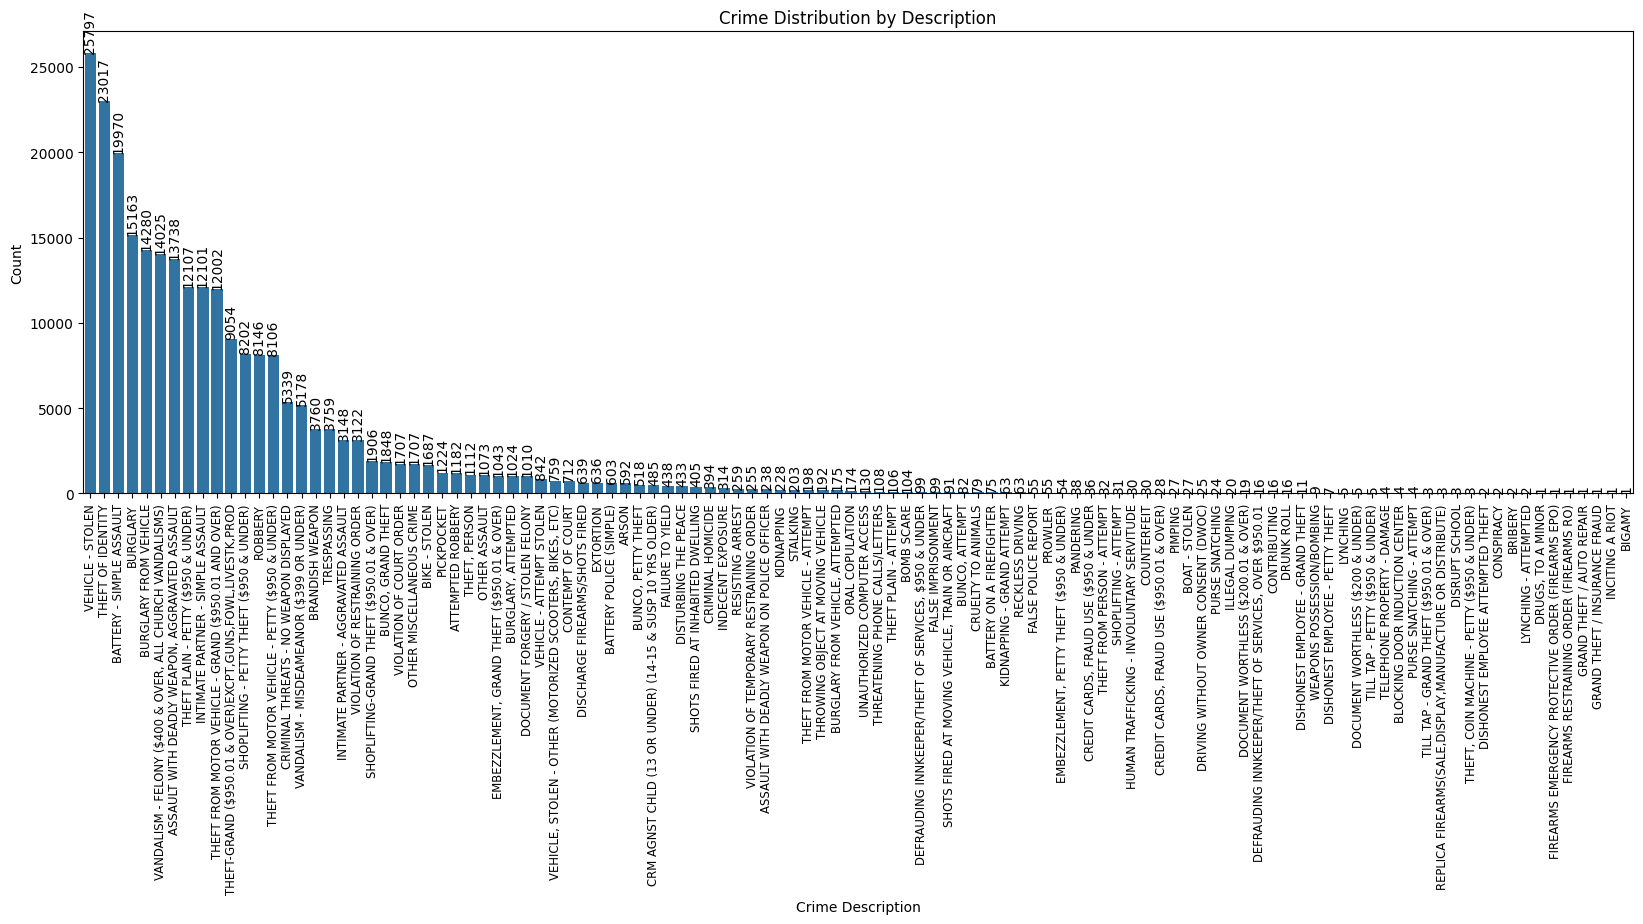

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.countplot(data=crimes, x='Crm Cd Desc', order=crimes['Crm Cd Desc'].value_counts().index)

# Calculate the counts of each crime description
counts = crimes['Crm Cd Desc'].value_counts()

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, rotation=90)

plt.xlabel('Crime Description')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.title('Crime Distribution by Description')  # Set the title
plt.xticks(rotation=90, fontsize='small')  # Adjust fontsize and rotation for x-ticks
plt.show()

#### **Trend of reported crimes over time**

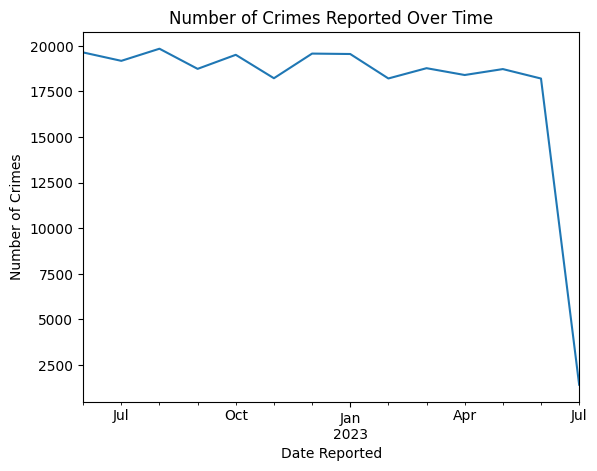

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

crimes.groupby(crimes['Date Rptd'].dt.to_period('M')).size().plot(kind='line')
plt.title('Number of Crimes Reported Over Time')
plt.xlabel('Date Reported')
plt.ylabel('Number of Crimes')
plt.show()

#### **Crime Distribution by Area**

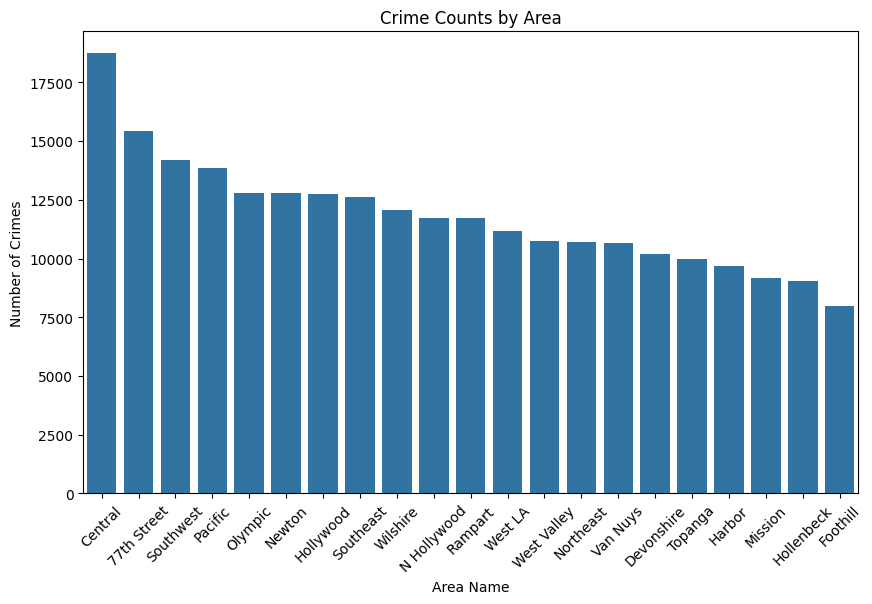

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes, x='AREA NAME', order=crimes['AREA NAME'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.show()

#### **Distribution of victim ages**

In [12]:
# Check the number of entries where Vict Age is 0
num_zero_age = crimes[crimes['Vict Age'] == 0].shape[0]
print(f"Number of entries with Victim Age as Zero: {num_zero_age}")

# Inspect the entries where Vict Age is 0
zero_age_entries = crimes[crimes['Vict Age'] == 0]

Number of entries with Victim Age as Zero: 62240


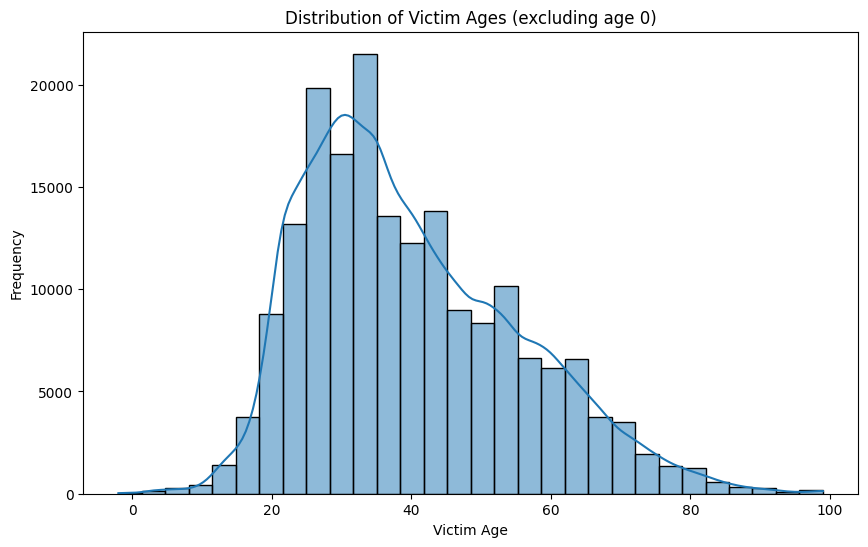

In [13]:
# Filter out entries where Vict Age is 0
filtered_crimes = crimes[crimes['Vict Age'] != 0]

# Plot the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(filtered_crimes['Vict Age'], bins=30, kde=True)
plt.title('Distribution of Victim Ages (excluding age 0)')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

### **Distribution of victim sex**

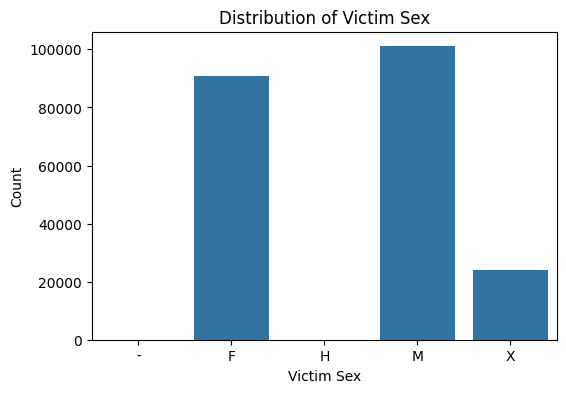

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=crimes, x='Vict Sex')
plt.title('Distribution of Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

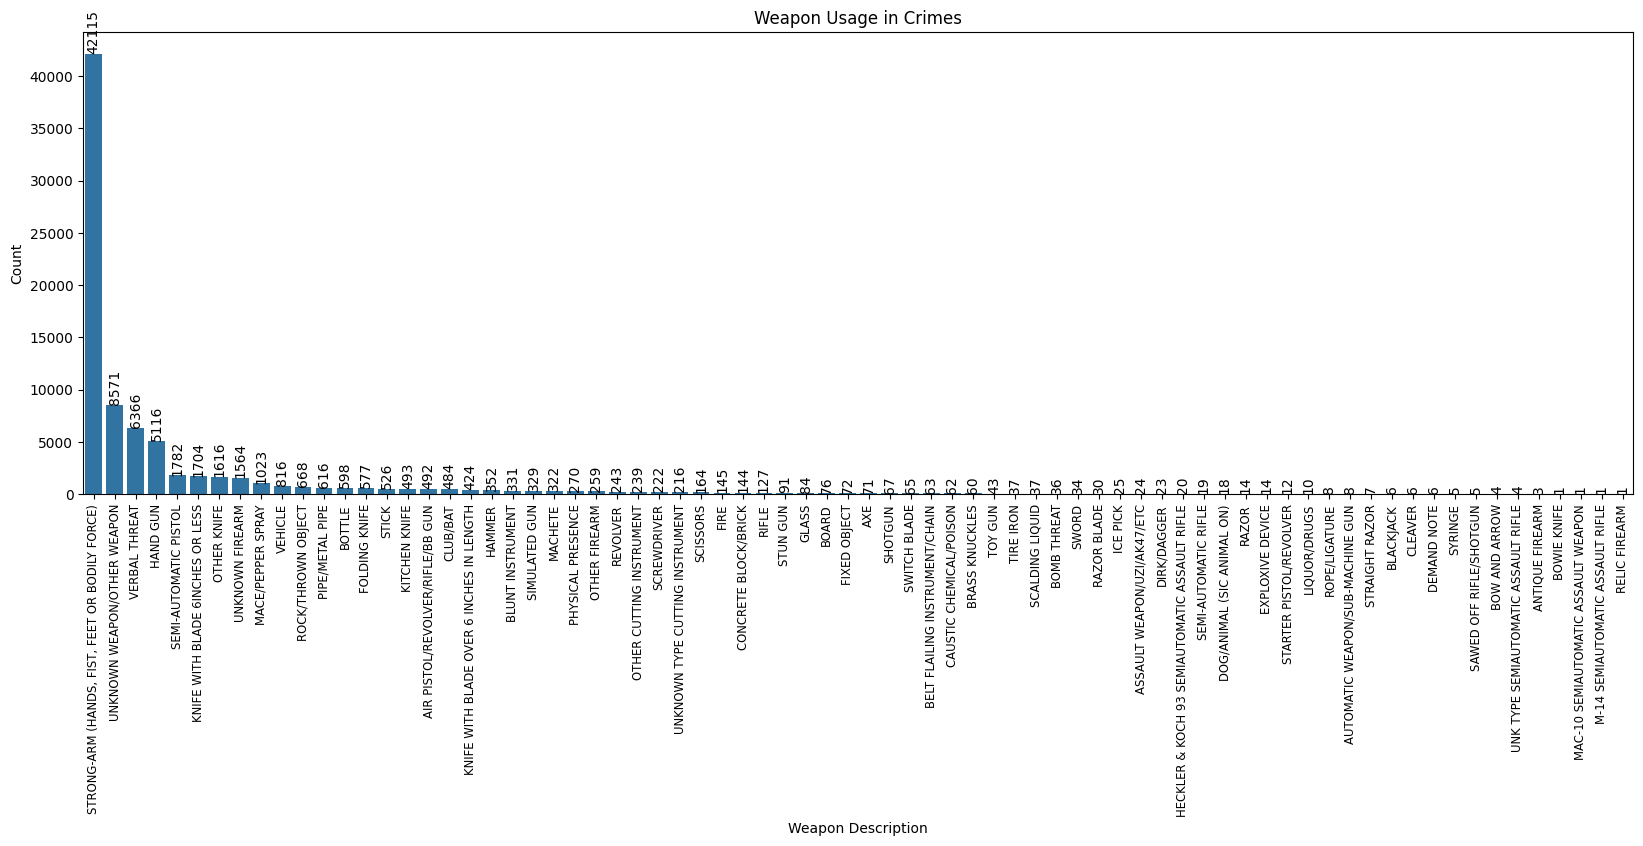

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(data=crimes, x='Weapon Desc', order=crimes['Weapon Desc'].value_counts().index)

# Calculate the counts of each crime description
counts = crimes['Weapon Desc'].value_counts()

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, rotation=90)

plt.title('Weapon Usage in Crimes')
plt.xticks(rotation=90, fontsize='small')
plt.xlabel('Weapon Description')
plt.ylabel('Count')
plt.show()

### **Distribution of crimes by hour of the day**

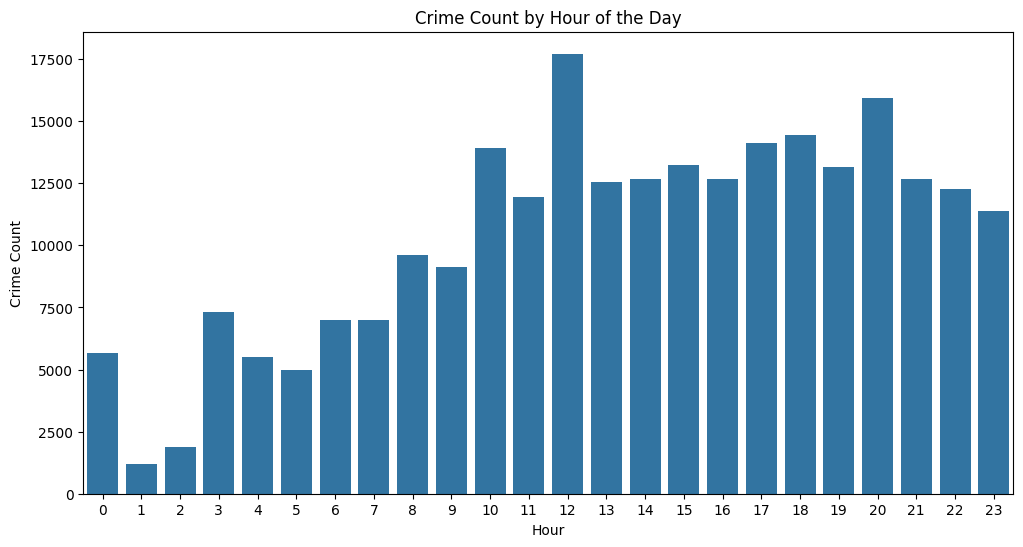

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x='hour')
plt.title('Crime Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.show()

### **Night vs. Day Crimes**

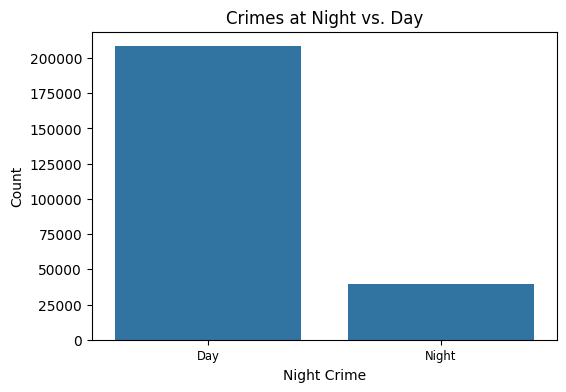

In [17]:
# Assuming 'crimes' is your DataFrame
plt.figure(figsize=(6, 4))
sns.countplot(data=crimes, x='night_crime')
plt.title('Crimes at Night vs. Day')
plt.xlabel('Night Crime')
plt.ylabel('Count')

# Set the tick positions and labels
plt.xticks(rotation=None, fontsize='small', ticks=[0, 1], labels=["Day", "Night"])

plt.show()

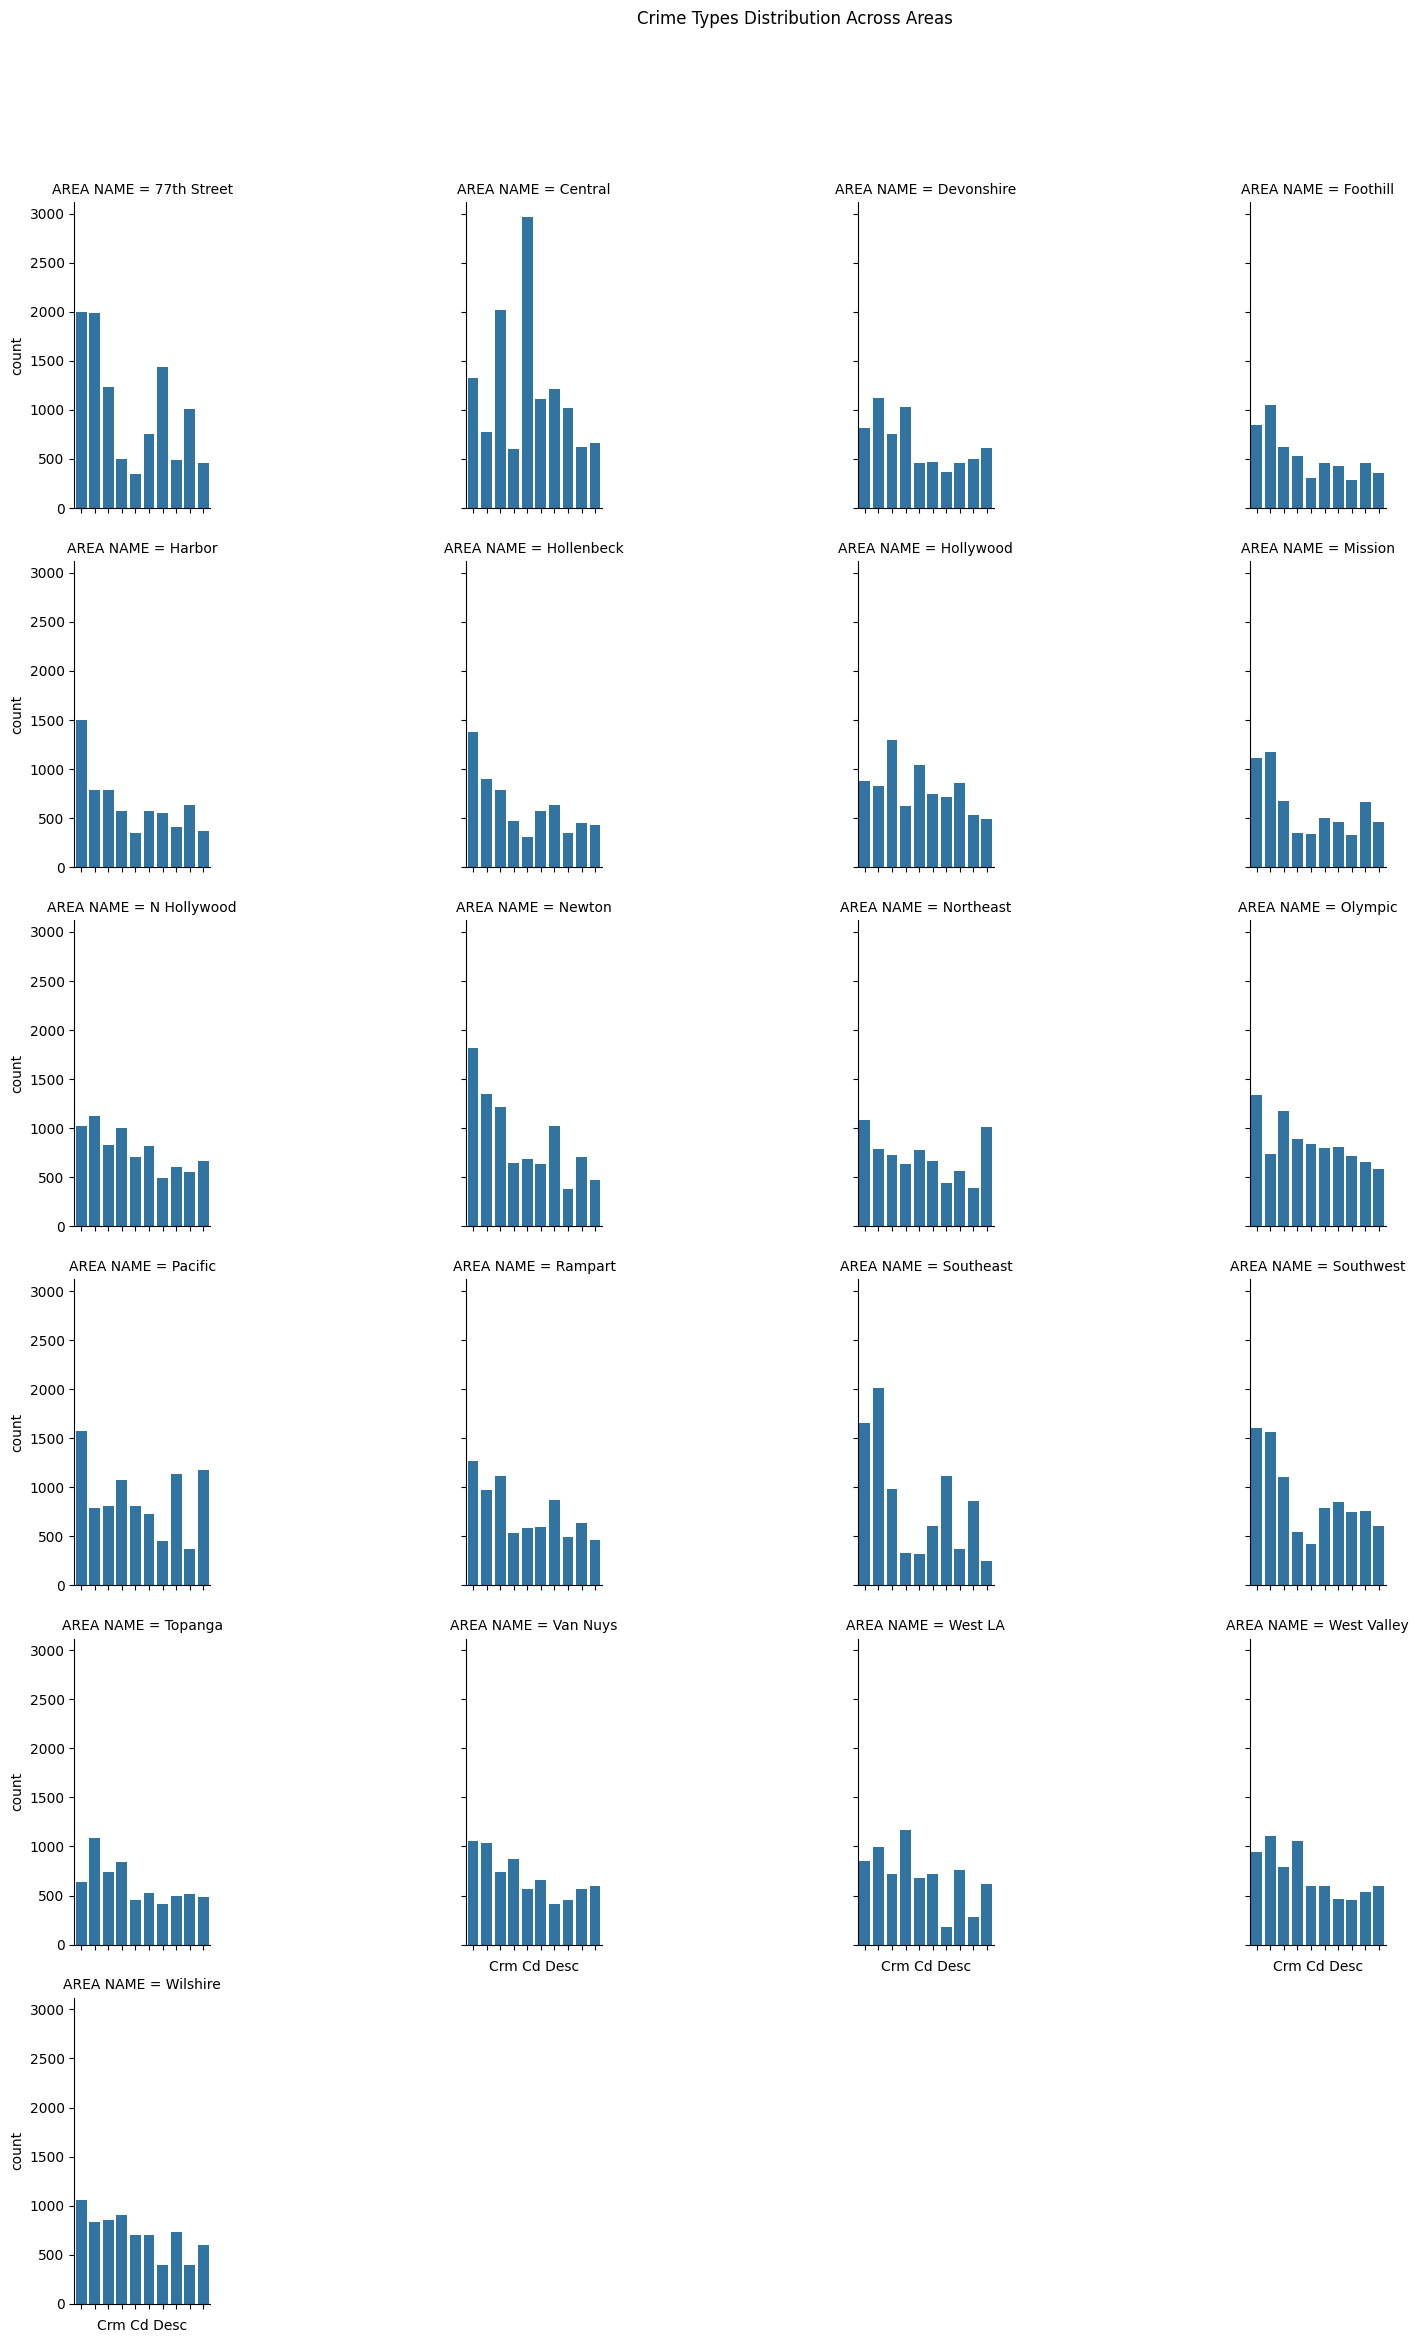

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 10 crime descriptions
top_10_crime_desc = crimes['Crm Cd Desc'].value_counts().index[:10]

# Filter the dataset to include only the top 10 crime descriptions
filtered_crimes = crimes[crimes['Crm Cd Desc'].isin(top_10_crime_desc)]

# Create the FacetGrid plot
g = sns.FacetGrid(filtered_crimes, col='AREA NAME', col_wrap=4, height=4)
g.map(sns.countplot, 'Crm Cd Desc', order=top_10_crime_desc)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Crime Types Distribution Across Areas')
plt.show()

### **Number of crimes over time**

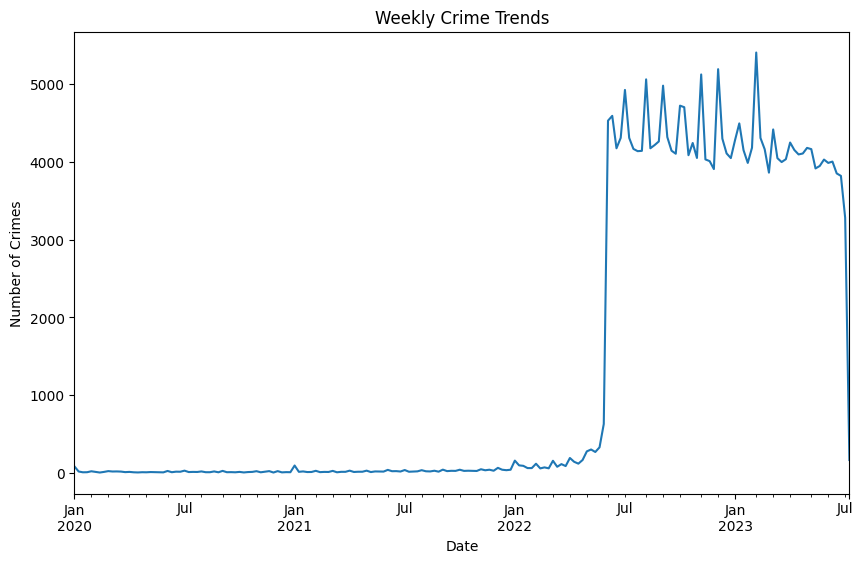

In [19]:
# Time Series Plot: Number of crimes over time
plt.figure(figsize=(10, 6))
crimes.resample('W', on='DATE OCC').size().plot(title='Weekly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

### **Crime counts by Vict Sex**

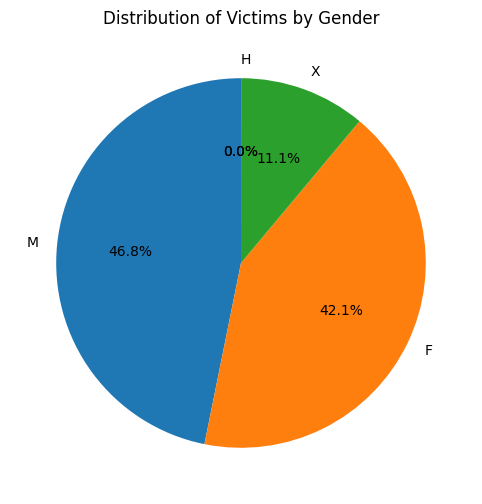

In [20]:
# Pie Chart: Crime counts by Vict Sex
plt.figure(figsize=(10, 6))
crimes['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Victims by Gender')
plt.ylabel('')
plt.show()

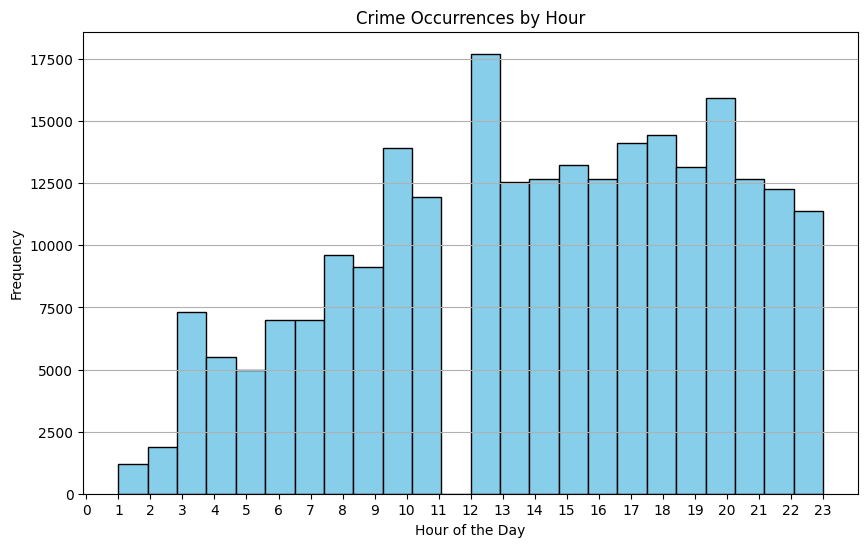

The hour with the highest frequency of crimes is: 12.0


In [21]:
# Extract the hour from the 'TIME OCC' column and find the peak crime hour
crimes['TIME OCC'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')
crimes['hour'] = crimes['TIME OCC'].dt.hour
peak_crime_hour1 = crimes['hour'].value_counts().idxmax()
peak_crime_hour = int(peak_crime_hour1)

# Plot a histogram showing crime occurrences over time
plt.figure(figsize=(10, 6))
plt.hist(crimes['hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Crime Occurrences by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24))
plt.grid(axis='y')
plt.show()

# Print the hour with the highest frequency of crimes
print(f"The hour with the highest frequency of crimes is: {peak_crime_hour1}")

The area with the largest frequency of night crimes is: Central


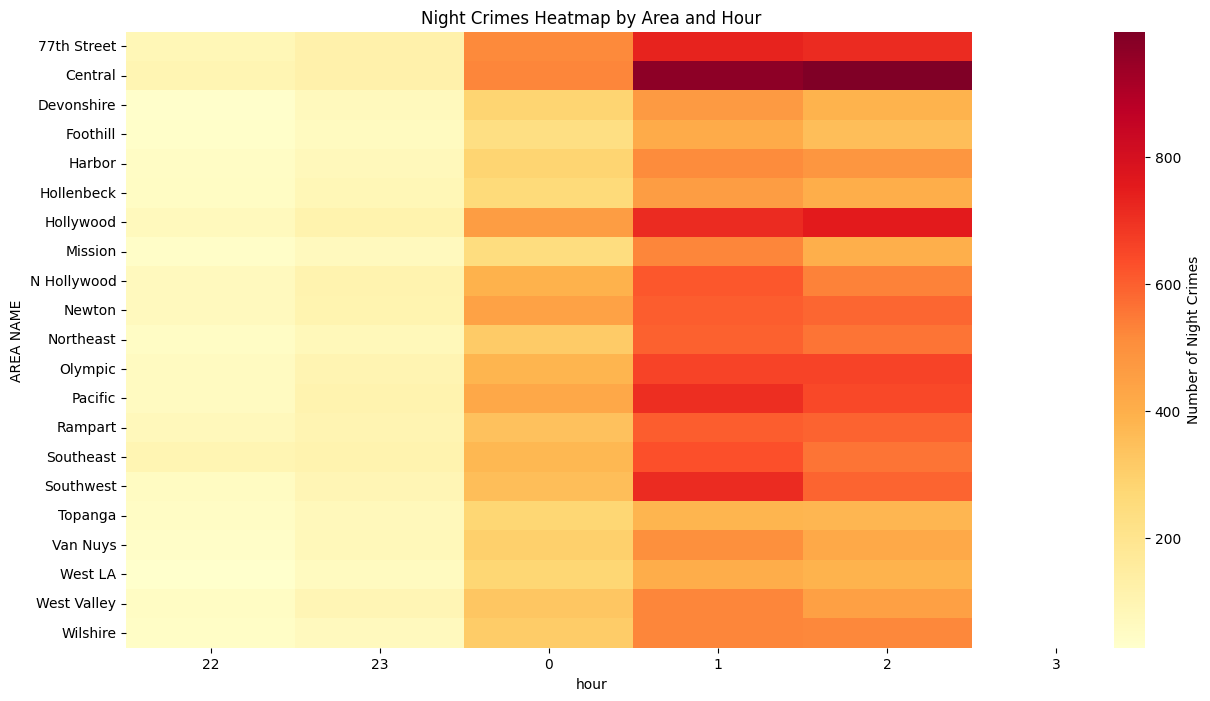

In [22]:
crimes['hour'] = crimes['TIME OCC'].dt.hour
crimes['night_crime'] = ((crimes['hour'] >= 22) | (crimes['hour'] <= 3))


# Filter for night crimes and find the area with the largest frequency
night_crimes = crimes[crimes['night_crime']]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

# Print the area with the largest frequency of night crimes
print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")

# Create a pivot table with 'AREA NAME' and 'hour' columns
heatmap_data = night_crimes.pivot_table(index='AREA NAME', columns='hour', aggfunc='size', fill_value=0)

# Define the order of hours
hour_order = list(range(22, 24)) + list(range(0, 4))

# Create a heatmap with specified order
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Number of Night Crimes'}, xticklabels=hour_order)
plt.title('Night Crimes Heatmap by Area and Hour')
plt.show()

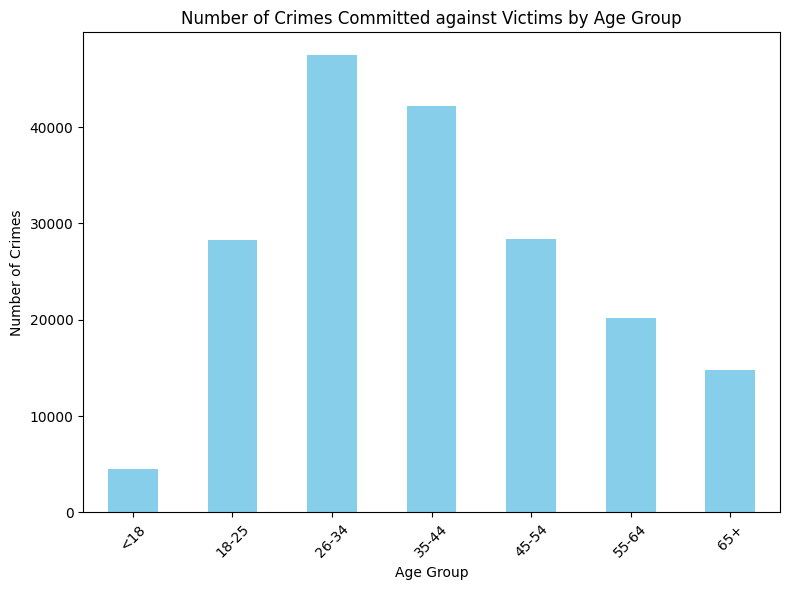

Number of crimes committed against victims by age group:
Victim Age Group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: count, dtype: int64


In [23]:
# Assuming the column 'Victim Age' contains the age of the victims, categorize them into age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]  # Define the age group bins
age_labels = ['<18', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']  # Labels for age groups

# Categorize victim ages into age groups
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Count the number of crimes per age group
victim_ages = crimes['Victim Age Group'].value_counts()

# Plotting the number of crimes per age group
plt.figure(figsize=(8, 6))
victim_ages.sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes Committed against Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the series of number of crimes per age group
print("Number of crimes committed against victims by age group:")
print(victim_ages)

### **Heatmap of Crime Incidents by Area and Crime Type**

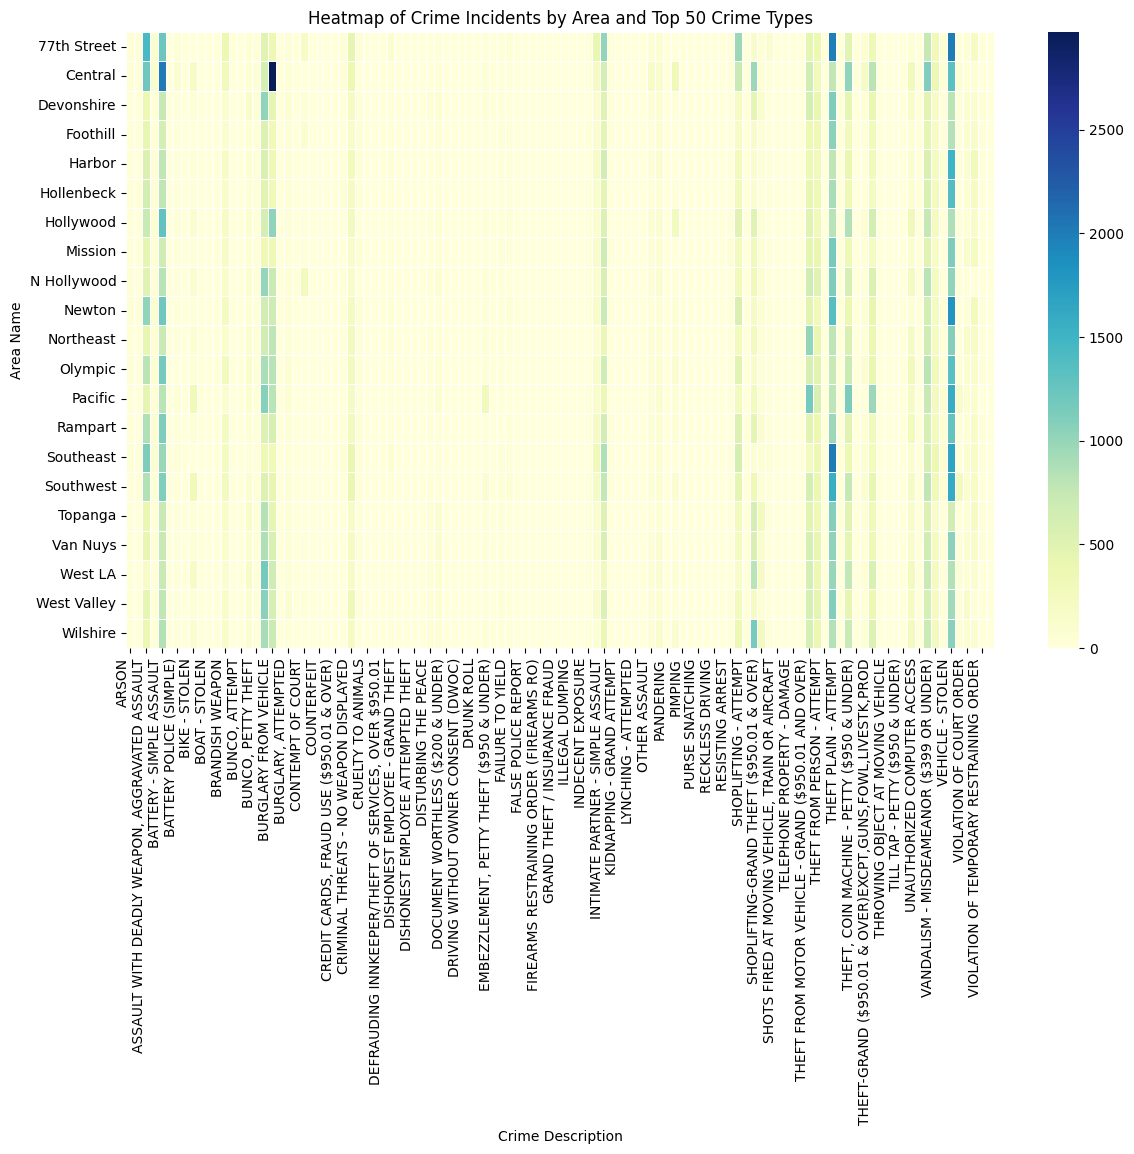

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 10 crime descriptions
top_50_crime_desc = crimes['Crm Cd Desc'].value_counts().index[:50] # Total is 110

# Filter the dataset to include only the top 10 crime descriptions
filtered_crimes = crimes[crimes['Crm Cd Desc'].isin(top_50_crime_desc)]

# Create a pivot table
pivot_table = filtered_crimes.pivot_table(
    index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Crime Incidents by Area and Top 50 Crime Types')
plt.xlabel('Crime Description')
plt.ylabel('Area Name')
plt.xticks(rotation=90, ha='right')
plt.show()

### **Distribution of victim ages across different crime types**

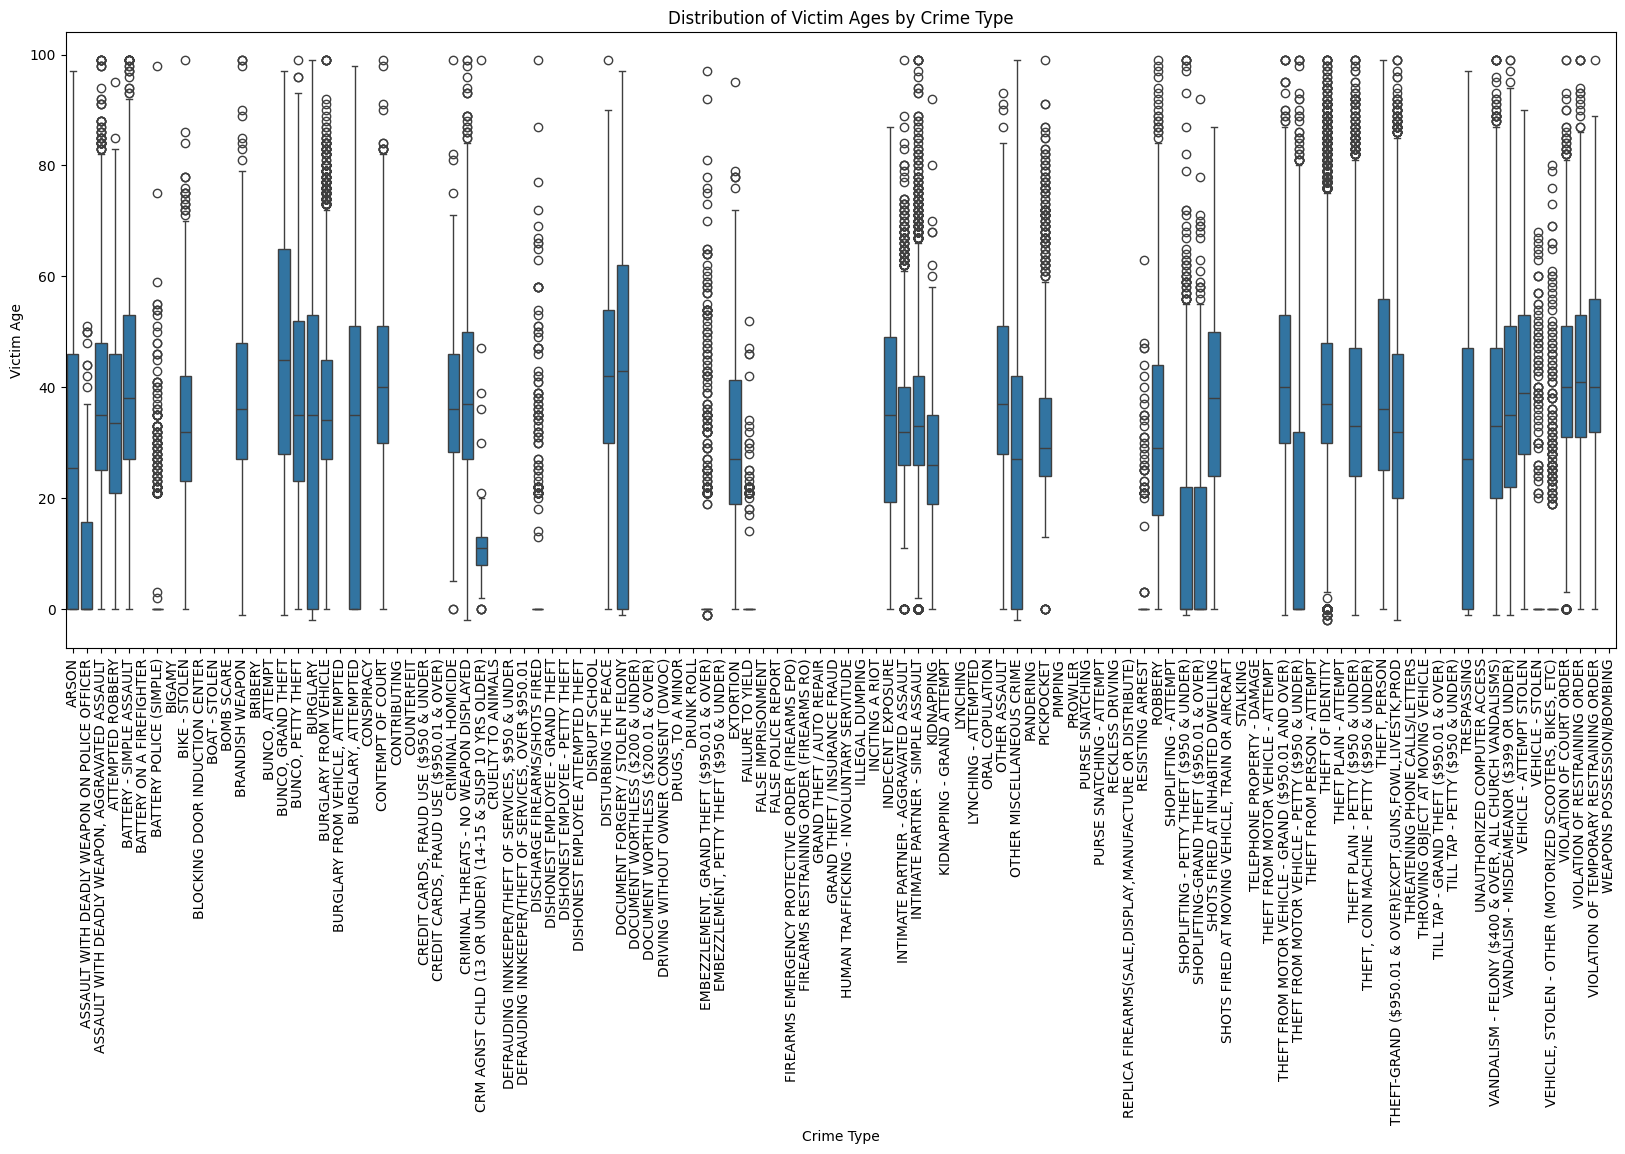

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=crimes[crimes['Crm Cd Desc'].isin(top_50_crime_desc)], x='Crm Cd Desc', y='Vict Age')
plt.xticks(rotation=90)
plt.title('Distribution of Victim Ages by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Victim Age')
plt.show()

### **FacetGrid of Crime Time by Area**

This FacetGrid plot can show the distribution of crime occurrence times across different areas, allowing you to see if certain areas have more night crimes.

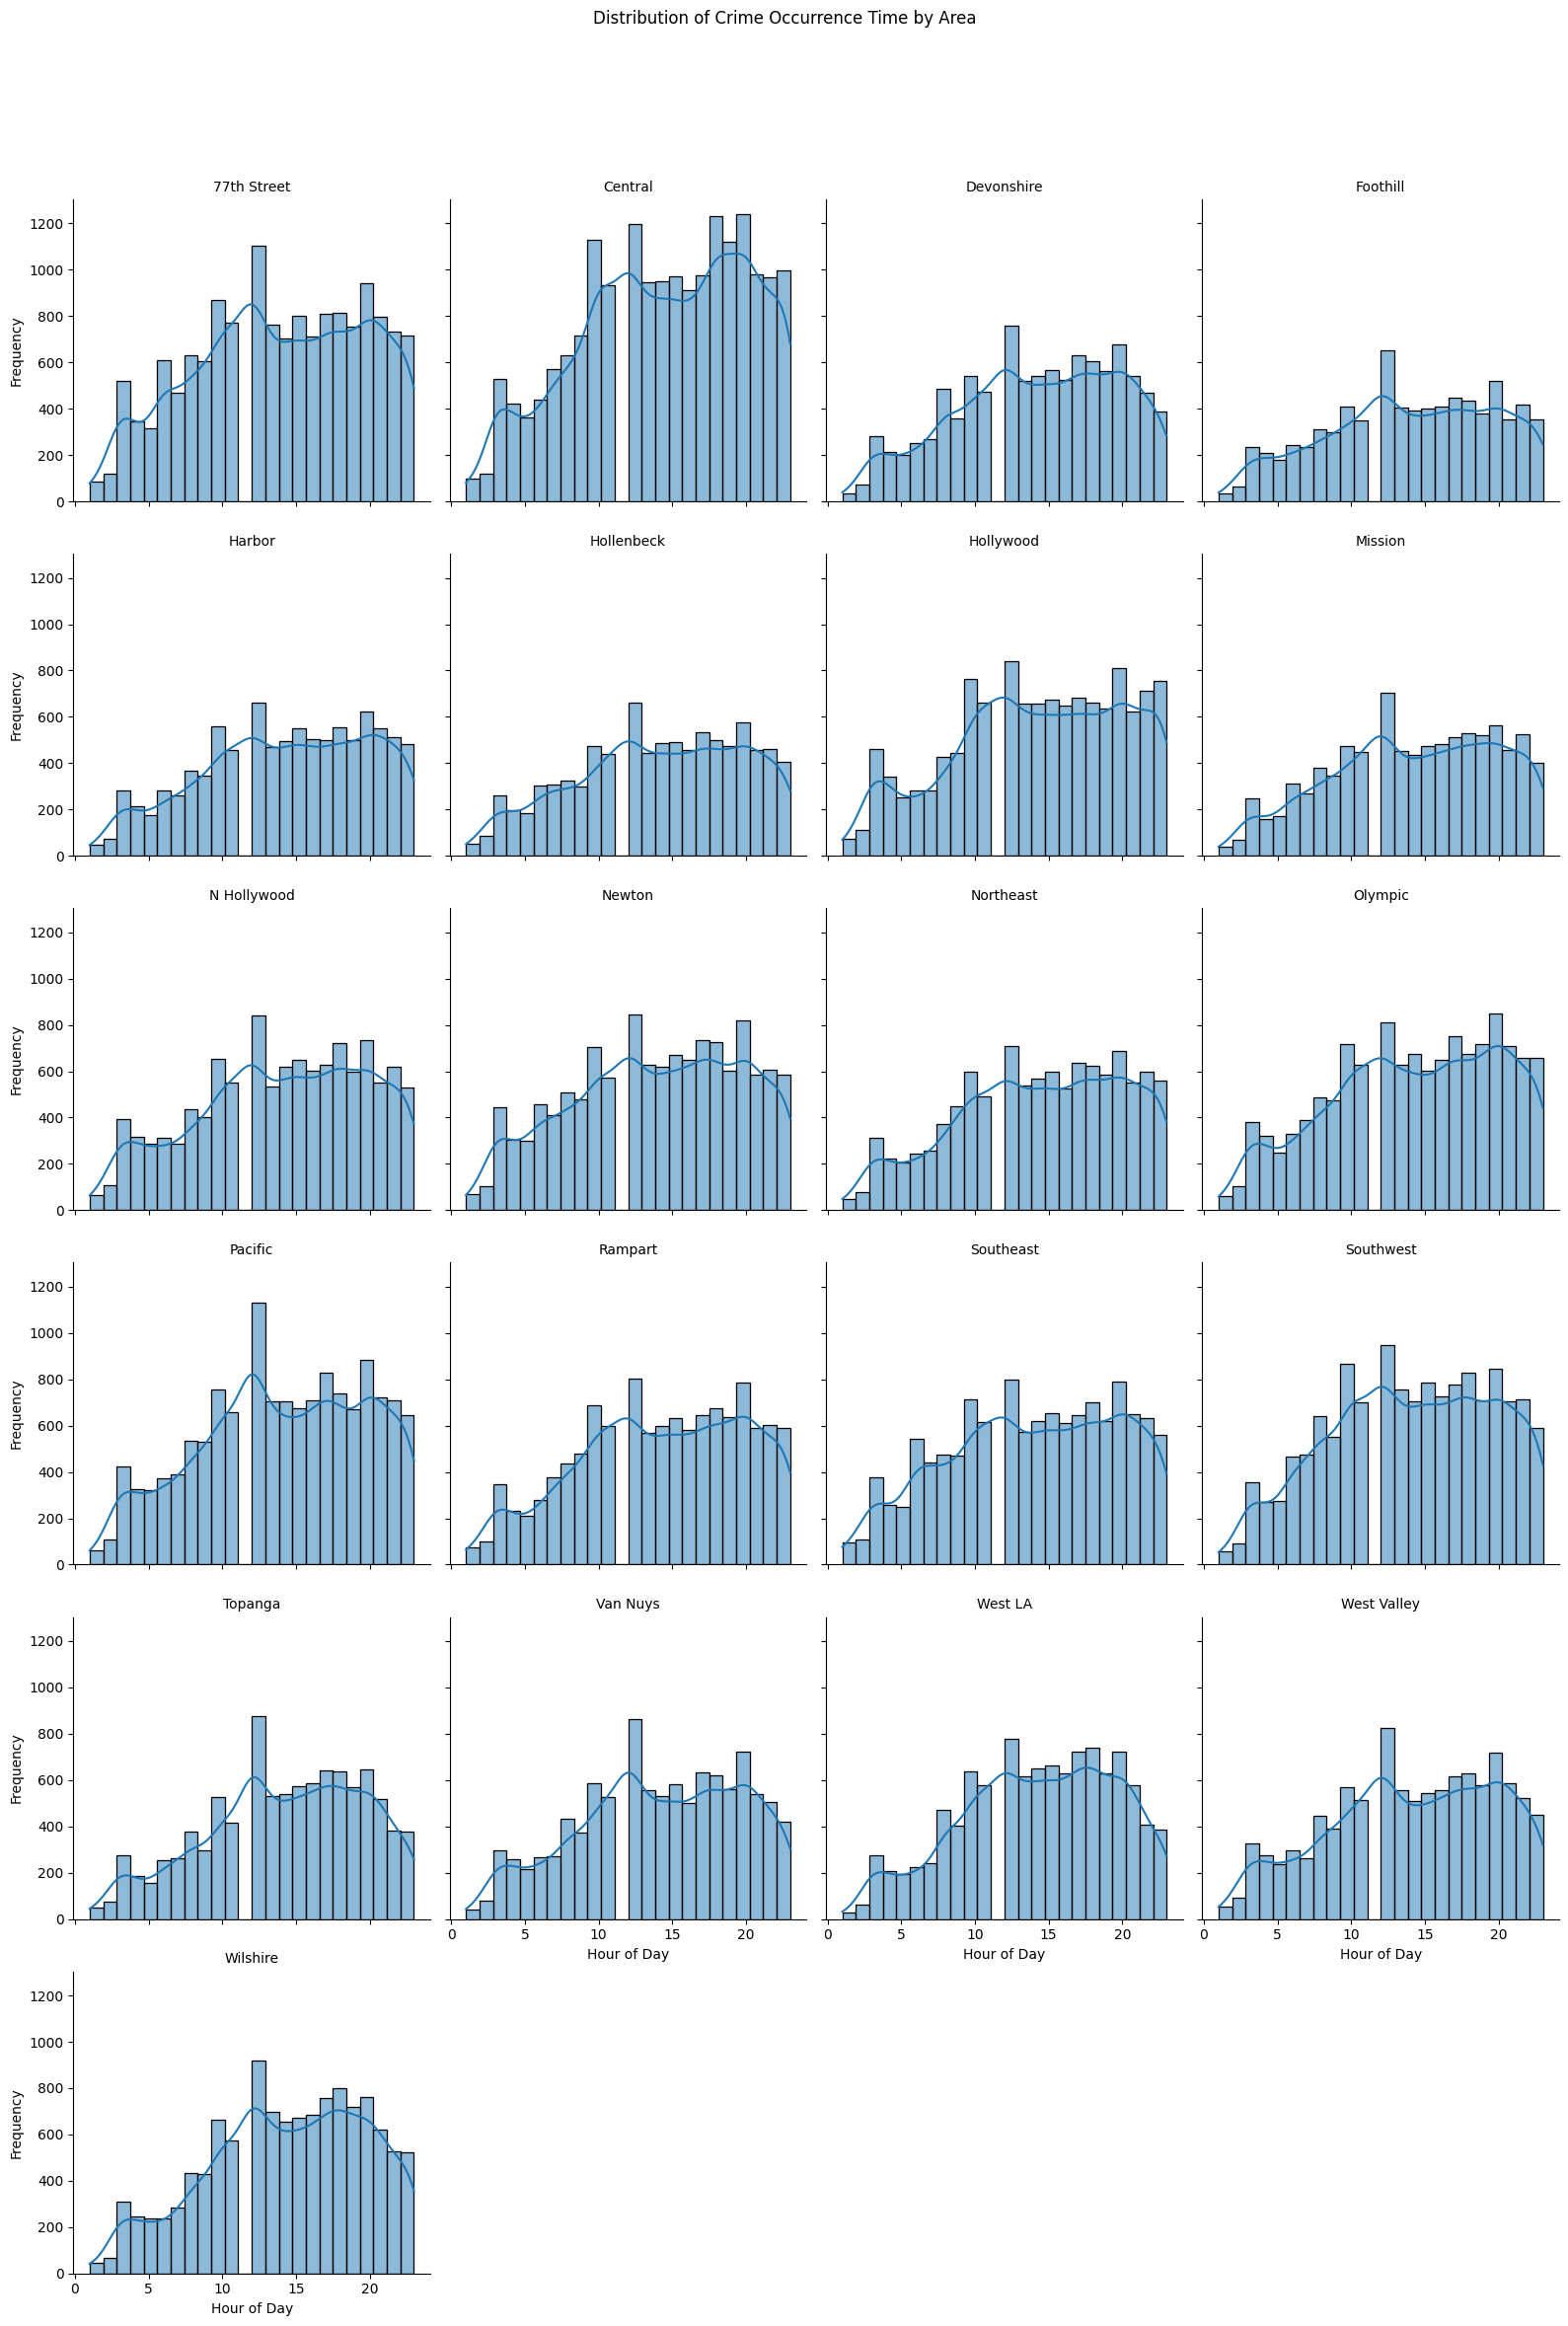

In [26]:
g = sns.FacetGrid(crimes, col='AREA NAME', col_wrap=4, height=4)
g.map(sns.histplot, 'hour', bins=24, kde=True)
g.set_axis_labels('Hour of Day', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Crime Occurrence Time by Area')
plt.show()